In [2]:
pip install scikit_optimize


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
## Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skopt
from skopt import gp_minimize
import warnings
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random


In [6]:
random.seed(10)

In [7]:
df = pd.read_csv('Ion_Plasma_data.csv', header=None, skiprows=1)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,300,300,1.8,100,200,20,3491,14.2,6.48,2.01
1,2,200,400,1.8,100,50,10,3884,3.9,5.98,1.91
2,3,200,400,1.2,150,200,20,4931,24.8,5.39,1.85
3,4,300,400,1.8,150,200,20,4726,6.6,5.97,2.11
4,5,200,400,1.2,150,50,10,5089,12.4,5.61,2.16
5,6,300,300,1.8,150,200,10,3452,6.5,6.55,2.28
6,7,300,400,1.8,100,50,20,5164,1.0,8.51,2.06
7,8,250,350,1.5,125,125,15,4108,8.9,5.74,1.89
8,9,200,300,1.8,150,200,20,3494,8.3,6.24,1.32
9,10,300,400,1.2,150,50,20,5300,0.5,9.64,3.09


In [8]:
df.dtypes


0       int64
1       int64
2       int64
3     float64
4       int64
5       int64
6       int64
7       int64
8     float64
9     float64
10    float64
dtype: object

In [9]:
print(df.var()) 



0        238.500000
1       2083.115385
2       2083.115385
3          0.081560
4        523.113933
5       3869.285196
6         20.923077
7     475329.629898
8        113.385036
9          4.782622
10         0.293021
dtype: float64


<AxesSubplot:ylabel='Density'>

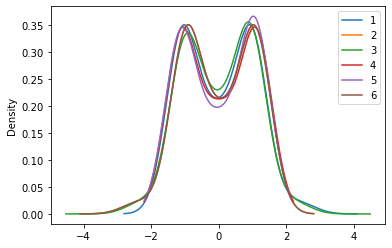

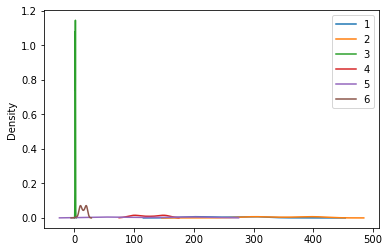

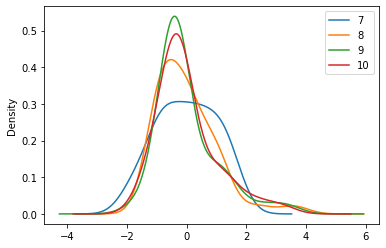

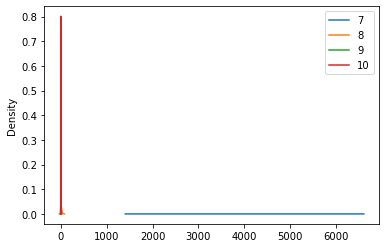

In [10]:
input_train = df.iloc[0:40,[1,2,3,4,5,6]]
output_train = df.iloc[0:40,[7,8,9,10]]
input_test = df.iloc[41:52,[1,2,3,4,5,6]]
output_test = df.iloc[41:52,[7,8,9,10]]

# normalizing with mean of 0 and sd of 1
input_train_norm = (input_train-input_train.mean())/input_train.std()

output_norm_train = (output_train-output_train.mean())/output_train.std()

input_test_norm = (input_test-input_test.mean())/input_test.std()

output_norm_test = (output_test-output_test.mean())/output_test.std()


input_train_norm.plot.kde()
input_train.plot.kde()
output_norm_train.plot.kde()
output_train.plot.kde()

Epoch 1/100
4/4 [==============================] - 1s 59ms/step - loss: 1.7277 - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1818
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 1.6968 - accuracy: 0.2500 - val_loss: nan - val_accuracy: 0.1818
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 1.6671 - accuracy: 0.2250 - val_loss: nan - val_accuracy: 0.1818
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 1.6410 - accuracy: 0.2250 - val_loss: nan - val_accuracy: 0.1818
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 1.6134 - accuracy: 0.2250 - val_loss: nan - val_accuracy: 0.1818
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 1.5848 - accuracy: 0.2250 - val_loss: nan - val_accuracy: 0.1818
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 1.5562 - accuracy: 0.2250 - val_loss: nan - val_accuracy: 0.1818
Epoch 8/100
4/4 [========================

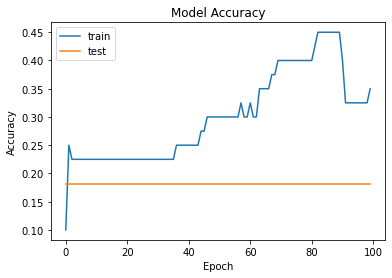

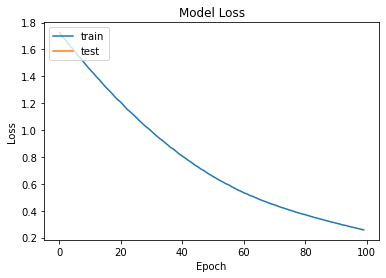

In [11]:
model = Sequential()

model.add(Dense(6, input_dim = 6, activation = 'relu', 
                      kernel_initializer='ones',
                      #kernel_regularizer= keras.regularizers.L1(0.01),
                      name="dense_0"))


model.add(Dense(4, activation='sigmoid', name="dense_2"))
      
      # Compile the keras model for a specified number of epochs.
model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
      
      
  # Fit keras model
history = model.fit(input_train_norm, output_norm_train, epochs = 100, batch_size=10, 
                          validation_data = (input_test_norm, output_norm_test), verbose=1)

  # Evaluate the model with the eval dataset.
score = model.evaluate(input_test_norm, output_norm_test, batch_size=10, verbose=1)

print('Test Loss:', score[0], ' Test Accuracy:', score[1])
      
  #accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
      
  #loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
SPC_Test = pd.read_csv('SPC-Testing.csv', header = None)
SPC_Train = pd.read_csv('SPC-Training.csv', header = None)

In [13]:
SPC_Test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.691,-2.426,1.440,-2.688,2.240,-2.577,1.541,-0.045,-1.093,-0.498,1,0,0,0,0,0,0
1,1.337,-0.014,-1.134,1.714,1.821,-1.989,-1.056,-1.823,2.408,0.906,1,0,0,0,0,0,0
2,-0.278,0.169,-2.756,-0.819,2.074,2.179,-0.616,1.405,-2.847,0.325,1,0,0,0,0,0,0
3,1.156,1.827,1.084,-0.675,-2.409,2.970,1.037,-1.972,-0.191,1.514,1,0,0,0,0,0,0
4,-2.849,-2.715,0.909,-0.211,2.050,-2.632,1.746,-0.534,1.426,-1.512,1,0,0,0,0,0,0


In [14]:
SPC_Train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.691,-2.426,1.440,-2.688,2.240,-2.577,1.541,-0.045,-1.093,-0.498,1,0,0,0,0,0,0
1,1.337,-0.014,-1.134,1.714,1.821,-1.989,-1.056,-1.823,2.408,0.906,1,0,0,0,0,0,0
2,-0.278,0.169,-2.756,-0.819,2.074,2.179,-0.616,1.405,-2.847,0.325,1,0,0,0,0,0,0
3,1.156,1.827,1.084,-0.675,-2.409,2.970,1.037,-1.972,-0.191,1.514,1,0,0,0,0,0,0
4,-2.849,-2.715,0.909,-0.211,2.050,-2.632,1.746,-0.534,1.426,-1.512,1,0,0,0,0,0,0


In [15]:
SPC_Test.shape

(250, 17)

In [16]:
SPC_Train.shape

(2500, 17)

<AxesSubplot:ylabel='Density'>

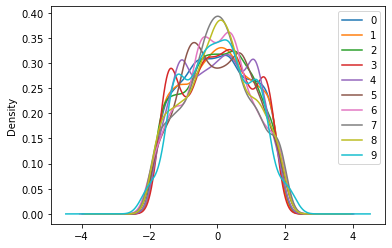

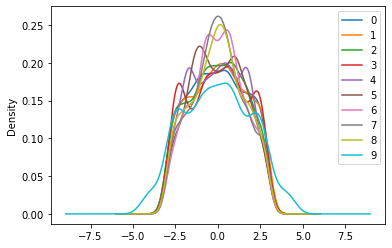

In [17]:


spc_input_train = SPC_Train.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
spc_output_train = SPC_Train.iloc[:,[10,11,12,13,14,15,16]]



spc_input_test = SPC_Test.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
spc_output_test = SPC_Test.iloc[:,[10,11,12,13,14,15,16]]

# normalizing with mean of 0 and sd of 1
spc_input_train_norm = (spc_input_train-spc_input_train.mean())/spc_input_train.std()

#output_norm_train = (output_train-output_train.mean())/output_train.std()

spc_input_test_norm = (spc_input_test-spc_input_test.mean())/spc_input_test.std()

#output_norm_test = (output_test-output_test.mean())/output_test.std()


spc_input_train_norm.plot.kde()
spc_input_train.plot.kde()

Epoch 1/220
84/84 [==============================] - 1s 3ms/step - loss: 0.6957 - accuracy: 0.2644 - val_loss: 0.6402 - val_accuracy: 0.3040
Epoch 2/220
84/84 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.3708 - val_loss: 0.5143 - val_accuracy: 0.4000
Epoch 3/220
84/84 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.4020 - val_loss: 0.4628 - val_accuracy: 0.4080
Epoch 4/220
84/84 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.4156 - val_loss: 0.4165 - val_accuracy: 0.4280
Epoch 5/220
84/84 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.4304 - val_loss: 0.3867 - val_accuracy: 0.4280
Epoch 6/220
84/84 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.4336 - val_loss: 0.3668 - val_accuracy: 0.4280
Epoch 7/220
84/84 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.4312 - val_loss: 0.3574 - val_accuracy: 0.4160
Epoch 8/220
8

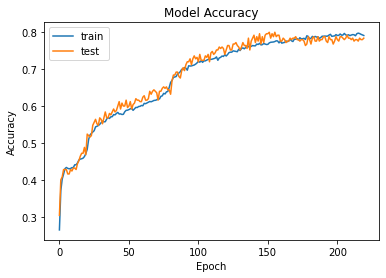

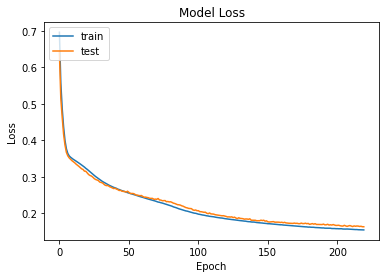

In [18]:
random.seed(10)

model = Sequential()

model.add(Dense(10, input_dim = 10, activation = 'relu', 
                      kernel_initializer='ones',
                      #kernel_regularizer= keras.regularizers.L1(0.01),
                      name="dense_0"))

model.add(Dense(8, input_dim = 10, activation = 'relu', 
                      name="dense_1"))

model.add(Dense(7, activation='sigmoid', name="dense_2"))
      
      # Compile the keras model for a specified number of epochs.
model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
      
      
history = model.fit(spc_input_train_norm, spc_output_train, epochs = 220, batch_size=30, 
                          validation_data = (spc_input_test_norm, spc_output_test), verbose=1)

score = model.evaluate(spc_input_test_norm, spc_output_test, batch_size=16, verbose=1)
print('Test loss:', score[0], ' Test accuracy:', score[1])
      

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
font_test = pd.read_csv('font_test.csv', header = None)
font_train = pd.read_csv('font_train.csv', header = None)

In [20]:
font_test.head()


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,5,0,6,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,14,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0
4,27,12,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0


In [21]:
font_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,10,1,1,0,0,0,4,6,0,...,0,0,0,0,0,0,0,0,0,0
3,21,10,4,4,0,1,1,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,27,12,3,3,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Density'>

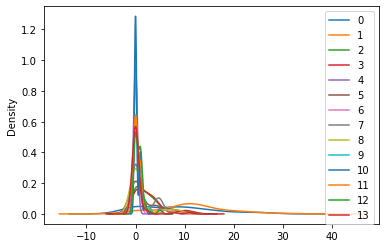

In [22]:
font_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]].plot.kde()

<AxesSubplot:ylabel='Density'>

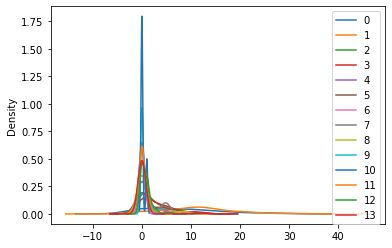

In [23]:
font_test.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]].plot.kde()

In [24]:
font_train.shape

(78, 40)

In [25]:
font_test.shape


(78, 40)

<AxesSubplot:ylabel='Density'>

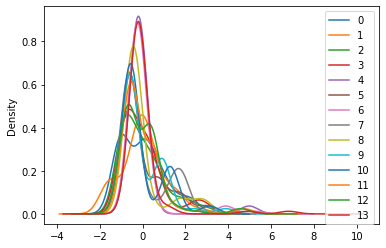

In [26]:
# Normalize data


input_train = font_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

output_train = font_train.iloc[:,[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]



input_test = font_test.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

output_test = font_test.iloc[:,[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]

# normalizing with mean of 0 and sd of 1
input_norm_train = (input_train-input_train.mean())/input_train.std()

#output_norm_train = (output_train-output_train.mean())/output_train.std()

input_norm_test = (input_test-input_test.mean())/input_test.std()

#output_norm_test = (output_test-output_test.mean())/output_test.std()


input_norm_train.plot.kde()

# plots looks same shape which is a good sign

<AxesSubplot:ylabel='Density'>

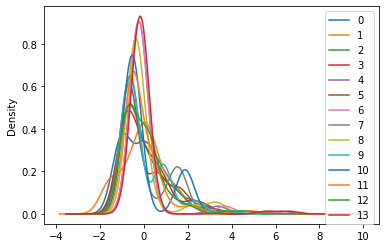

In [27]:
input_norm_test.plot.kde()

In [28]:
input_norm_train.shape


(78, 14)

In [29]:
output_norm_train.shape


(40, 4)

In [30]:

output_norm_test.shape

(11, 4)

In [31]:

input_norm_test.shape


(78, 14)

Epoch 1/4500
3/3 [==============================] - 1s 89ms/step - loss: 0.8836 - accuracy: 0.0385 - val_loss: 0.8918 - val_accuracy: 0.0385
Epoch 2/4500
3/3 [==============================] - 0s 20ms/step - loss: 0.8536 - accuracy: 0.0385 - val_loss: 0.8598 - val_accuracy: 0.0385
Epoch 3/4500
3/3 [==============================] - 0s 19ms/step - loss: 0.8228 - accuracy: 0.0385 - val_loss: 0.8305 - val_accuracy: 0.0385
Epoch 4/4500
3/3 [==============================] - 0s 16ms/step - loss: 0.7949 - accuracy: 0.0385 - val_loss: 0.8030 - val_accuracy: 0.0385
Epoch 5/4500
3/3 [==============================] - 0s 16ms/step - loss: 0.7719 - accuracy: 0.0385 - val_loss: 0.7769 - val_accuracy: 0.0385
Epoch 6/4500
3/3 [==============================] - 0s 17ms/step - loss: 0.7479 - accuracy: 0.0385 - val_loss: 0.7529 - val_accuracy: 0.0385
Epoch 7/4500
3/3 [==============================] - 0s 13ms/step - loss: 0.7257 - accuracy: 0.0385 - val_loss: 0.7310 - val_accuracy: 0.0385
Epoch 8/4500


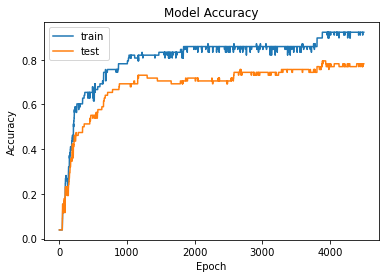

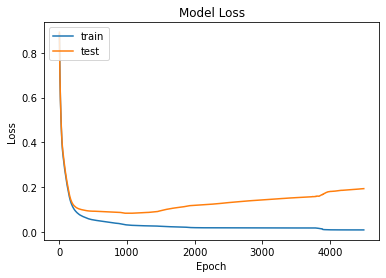

In [32]:
random.seed(10)

model = Sequential()

model.add(Dense(14, input_dim = 14, activation = 'relu', 
                      kernel_initializer='ones',
                      #kernel_regularizer= keras.regularizers.L1(0.01),
                      name="dense_0"))

model.add(Dense(20, input_dim = 14, activation = 'relu', 
                      name="dense_1"))


model.add(Dense(26, activation='sigmoid', name="dense_2"))
      
model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
      

history = model.fit(input_norm_train, output_train, epochs = 4500, batch_size=30, 
                          validation_data = (input_norm_test, output_test), verbose=1)


score = model.evaluate(input_norm_test, output_test, batch_size=30, verbose=1)
print('Test loss:', score[0], '   Test accuracy:', score[1])
      

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()